### Aplicación de PCA y K-MEANS al **CRISIS DE LA CORRUPCIÓN** ajustando el número de variables'per'

#### **Contexto**
La 
---


#### **Impacto en Programas de Gobierno**
1. **Salud Pública y Bienestar Social**:
   - Políticas para atender necesidades sociales críticas durante la pandemia.
   - Reducir desigua

#### **Variables 'per' elegidas para representar el efecto del DROGAS y CORRUPCIÓN en programas de gobierno**

- **per605**: 
  - Law and Order: Positive (Dominio: Fabric of Society)  
    <img src="../assets/per605_1_drogas.png" alt="Descripción per605_1" style="width:600px;">

- **per605**: 
  - Law and Order: Negative (Dominio: Fabric of Society)  
    <img src="../assets/per605_2_drogas.png" alt="Descripción per605_2" style="width:600px;">

- **per104**: 
  - Military: Positive (Dominio: External Relations)  
    <img src="../assets/per104_drogas.png" alt="Descripción per104" style="width:600px;">

- **per304**: 
  - Political Corrupcion (Dominio: Political System)  
    <img src="../assets/per304_drogas.png" alt="Descripción per304" style="width:600px;">
  

#### Cargamos librerías

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#### Cargamos la matriz de aspectos y la descripción de las variables 'per'

In [20]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
data_aspectos = {
    'aspecto': ['DROGAS_Y_CORRUPCIÓN'],
    'var_1': ['per605'],
    'var_2': ['per104'],
    'var_3': ['per304']
}
df_aspectos = pd.DataFrame(data_aspectos)
display(df_aspectos)
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
display(df_AD.head())

,aspecto,var_1,var_2,var_3
0,DROGAS_Y_CORRUPCIÓN,per605,per104,per304


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [21]:
detalle_dominio_values = df_AD['Detalle_Dominio'].unique().tolist()
print(detalle_dominio_values)

['Foreign Special Relationships: Positive', 'Foreign Special Relationships: Negative', 'Anti-Imperialism', 'Military: Positive', 'Military: Negative', 'Peace', 'Internationalism: Positive', 'European Community/Union: Positive', 'Internationalism: Negative', 'European Community/Union: Negative', 'Freedom and Human Rights', 'Democracy', 'Constitutionalism: Positive', 'Constitutionalism: Negative', 'Decentralization', 'Centralisation', 'Governmental and Administrative Efficiency', 'Political Corruption', 'Political Authority', 'Free Market Economy', 'Incentives: Positive', 'Market Regulation', 'Economic Planning', 'Corporatism/Mixed Economy', 'Protectionism: Positive', 'Protectionism: Negative', 'Economic Goals', 'Keynesian Demand Management', 'Economic Growth: Positive', 'Technology and Infrastructure: Positive', 'Controlled Economy', 'Nationalisation', 'Economic Orthodoxy', 'Marxist Analysis', 'Anti-Growth Economy: Positive', 'Environmental Protection', 'Culture: Positive', 'Equality: P

#### Carga del dataset y definición del périodo en análisis ('desde' y 'hasta'), y el 'aspecto'

In [39]:
# Cargar el dataset principal
# Nota: 'data/MP_Dataset_KMeans_mean.xlsx' se genera desde el data set 'crudo' del Manifesto Project (notebook 'Crea_df_ponderado.ipynb'),
# el cual ha sido ponderado por 'presvote' o 'pervote' y se le ha agregado la columna 'agno'
# Se han eliminado filas con valores NaN y columnas que NO son necesarias para K-MEANS (ventana_5, ventan_10, tipovoto)

file_path = './data/MP_Dataset_KMeans_mean.xlsx'
df = pd.read_excel(file_path)

# Filtrar el DataFrame según las variables del aspecto seleccionado y el período
aspecto_filtro = 'DROGAS_Y_CORRUPCIÓN'
desde = 2019
hasta = 2022

variables = df_aspectos[df_aspectos['aspecto'] == aspecto_filtro][['var_1', 'var_2', 'var_3']].dropna().values.flatten()

In [23]:
df.columns

Index(['agno', 'countryname', 'per101', 'per102', 'per103', 'per104', 'per105',
       'per106', 'per107', 'per108',
       ...
       'per6013', 'per6014', 'per6061', 'per6071', 'per6072', 'per6081',
       'per7051', 'per7052', 'per7061', 'per7062'],
      dtype='object', length=112)

In [24]:
df

,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
0,1997,Albania,1.770988,0.000000,0.031388,3.046506,0.015910,0.032313,3.406129,1.114989,...,2.021481,0.0,0.0,0.0,0.0,0.0,0.637892,0.363756,0.0,0.0
1,2001,Albania,2.392570,0.000000,0.000000,2.757403,0.026619,0.023948,3.523162,1.452779,...,0.989546,0.0,0.0,0.0,0.0,0.0,0.897238,0.508457,0.0,0.0
2,1989,Argentina,0.000000,0.000000,4.619213,0.448618,0.828036,0.338070,2.955090,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,1995,Argentina,0.061642,0.020140,0.143247,0.882433,0.083005,1.107286,1.996025,1.669947,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,1999,Argentina,0.192543,0.000000,0.582363,0.524400,0.017829,0.613450,3.482869,2.262154,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2008,United States,1.978711,0.088485,0.044020,5.839310,0.088485,1.308294,8.863648,0.343947,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
735,2012,United States,0.505120,0.161887,0.189797,7.527242,1.491961,0.658037,6.073936,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
736,2016,United States,0.866280,0.111349,0.000000,5.807609,0.763045,0.635581,4.669601,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
737,2020,United States,1.190682,0.129249,0.161450,5.565559,1.951804,0.480557,3.907785,0.020377,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


### Analicemos la distribución de las variables seleccionadas en todo el dataset (todos los períodos) 

Estadísticas descriptivas considerando todos los períodos:


,count,mean,std,min,25%,50%,75%,max
per605,739.0,2.638929,2.532031,0.0,0.485211,2.010903,4.179203,14.205347
per104,739.0,1.744785,2.098206,0.0,0.460461,1.133104,2.259821,17.526838
per304,739.0,1.263001,2.042249,0.0,0.064259,0.560677,1.583637,17.596681


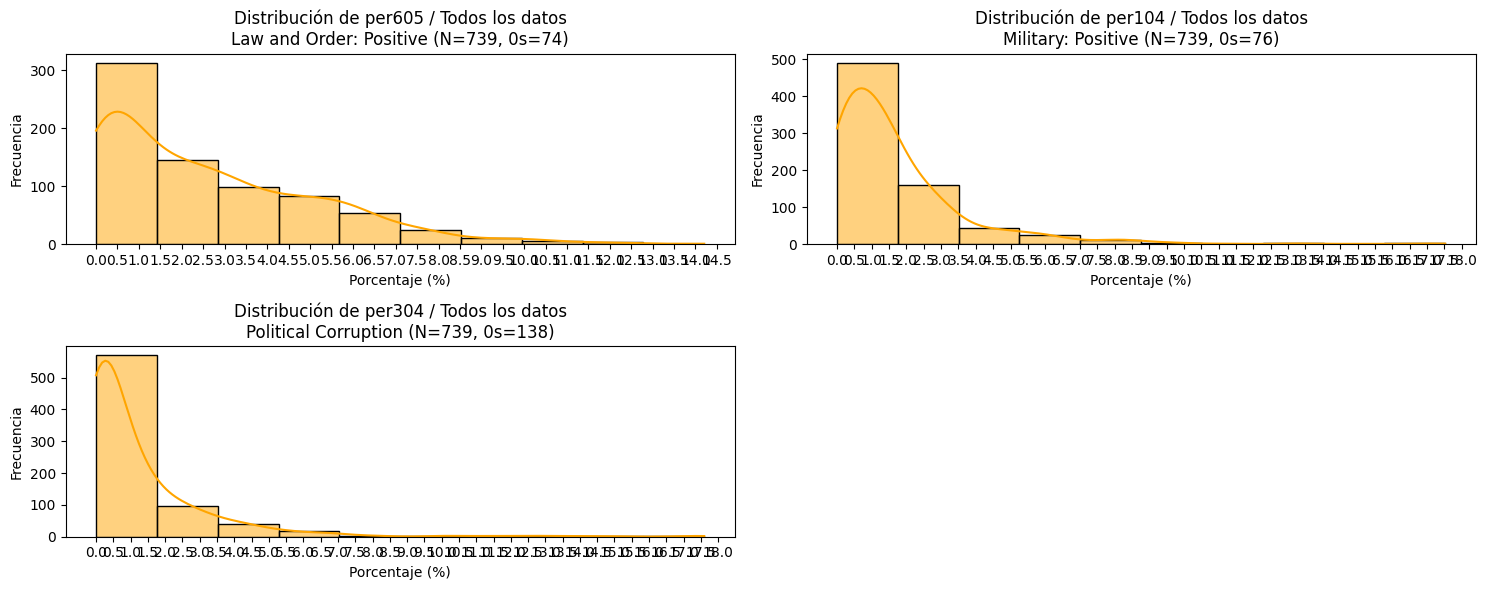

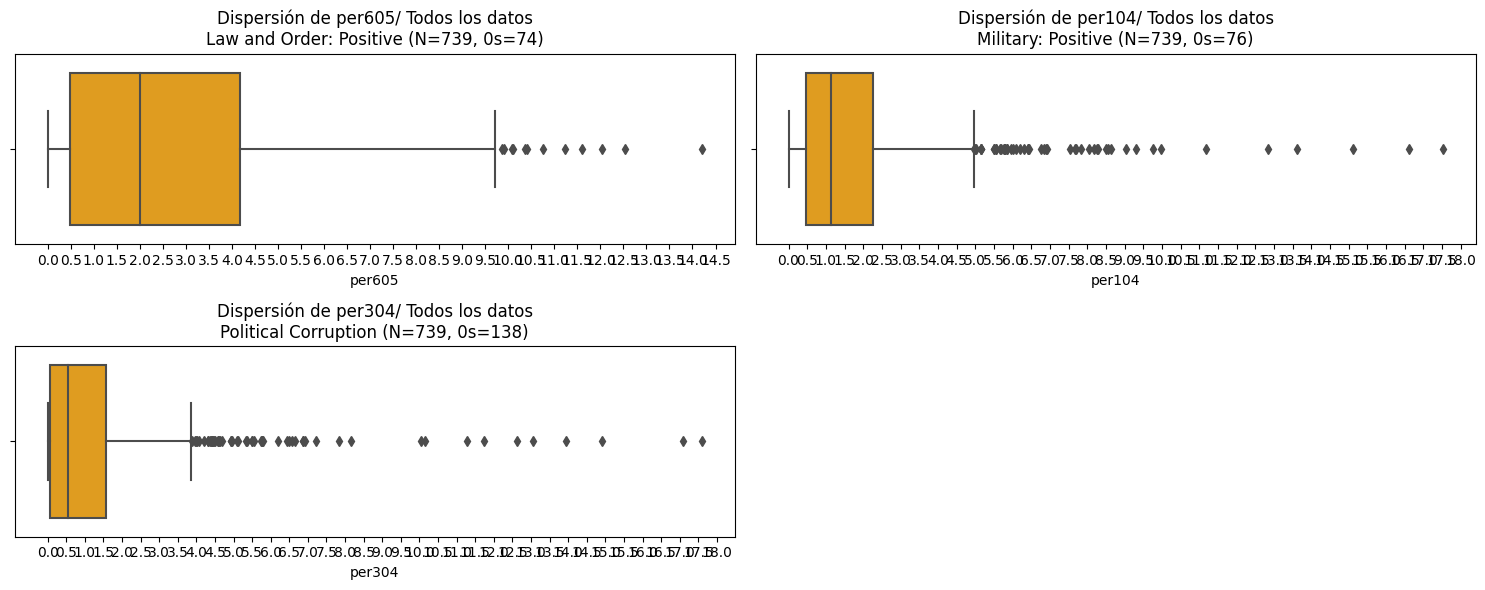

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de variables 'per' seleccionadas para el análisis
selected_variables = variables  # Asegúrate de que esta lista ya contenga las variables relevantes

# Asegurar que las variables existen en el DataFrame
selected_variables = [var for var in selected_variables if var in df.columns]

# Filtrar el dataframe para las columnas seleccionadas
df_selected = df[selected_variables].fillna(0)  # Rellenar valores NaN con 0

# Obtener el detalle de las variables del DataFrame 'df_AD'
variable_details = dict(zip(df_AD['Variable_per'], df_AD['Detalle_Dominio']))

# Estadísticas descriptivas
print("Estadísticas descriptivas considerando todos los períodos:")
display(df_selected.describe().T)

# Visualizar histogramas para las variables seleccionadas
num_variables = len(selected_variables)
plt.figure(figsize=(15, num_variables * 2))  # Ajustar altura del gráfico en función de las variables

for i, var in enumerate(selected_variables):
    plt.subplot((num_variables + 1) // 2, 2, i + 1)  # Dos gráficos por línea
    sns.histplot(df_selected[var], kde=True, bins=10, color='orange')  # Color de las barras en naranja
    detail = variable_details.get(var, "Detalle no disponible")  # Obtener detalle o indicar no disponible
    count = len(df_selected[var])  # Número total de datos
    zeros = (df_selected[var] == 0).sum()  # Número de valores iguales a cero
    plt.title(f'Distribución de {var} / Todos los datos\n{detail} (N={count}, 0s={zeros})')
    plt.xlabel('Porcentaje (%)')
    plt.ylabel('Frecuencia')
    plt.xticks(np.arange(0, df_selected[var].max() + 0.5, 0.5))  # Barras cada 0.5%

plt.tight_layout()
plt.show()

# Visualizar boxplots para observar la dispersión de las variables seleccionadas
plt.figure(figsize=(15, num_variables * 2))  # Ajustar altura del gráfico en función de las variables

for i, var in enumerate(selected_variables):
    plt.subplot((num_variables + 1) // 2, 2, i + 1)  # Dos gráficos por línea
    sns.boxplot(x=df_selected[var], color='orange')  # Color del boxplot en naranja
    detail = variable_details.get(var, "Detalle no disponible")  # Obtener detalle o indicar no disponible
    count = len(df_selected[var])  # Número total de datos
    zeros = (df_selected[var] == 0).sum()  # Número de valores iguales a cero
    plt.title(f'Dispersión de {var}/ Todos los datos\n{detail} (N={count}, 0s={zeros})')
    plt.xlabel(var)
    plt.xticks(np.arange(0, df_selected[var].max() + 0.5, 0.5))  # Barras cada 0.5%

plt.tight_layout()
plt.show()


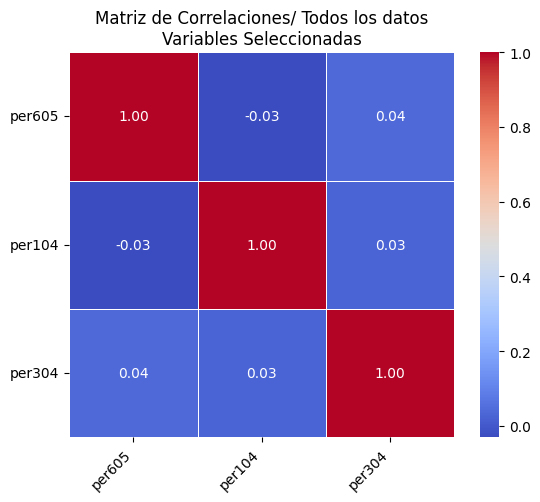

No hay variables con correlación mayor al umbral establecido.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlaciones para las variables seleccionadas
correlation_matrix = df_selected[selected_variables].corr()

# Visualizar la matriz de correlaciones como un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    linewidths=0.5, 
    square=True
)
plt.title("Matriz de Correlaciones/ Todos los datos\nVariables Seleccionadas")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificar pares de variables altamente correlacionadas (umbral > 0.8)
threshold = 0.8
high_corr_pairs = correlation_matrix.where(
    (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
).stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

if not high_corr_pairs.empty:
    print("Pares de variables altamente correlacionadas:")
    display(high_corr_pairs)
else:
    print("No hay variables con correlación mayor al umbral establecido.")


#### Análisis de las correlaciones:
* La máxima correlación posotiva es 0,29: Las variables tienen alguna relación en ciertos contextos, pero no son interdependientes de manera significativa en la mayoría de los casos.
* La máxima correlación negativa es -0,13: Hay competencia leve entre algunas variables, pero no es significativa. Esto puede deberse a que las variables representan temas conceptualmente distintos o porque la variabilidad es muy baja
* La falta de correlaciones fuertes sugiere que las variables están actuando de manera relativamente independiente, lo cual es valioso para el análisis de clusters.


#### COMENTARIO a la distribución de las variables seleccionadas considerando todo el dataset:
* El hecho de que las variables 'per' estén normalizadas y deban sumar 1 para cada año-país introduce dependencia entre las variables
* Esto significa que si una o más variables tienen valores altos en un año-país específico, necesariamente las otras variables tendrán valores bajos, incluso 0, para mantener la suma constante
* Como hay muchas combinaciones año-país donde ciertas variables 'per' tienen poca relevancia (p. ej., corrupción o drogas no son temas prioritarios en ciertos contextos), sus valores tienden a ser pequeños o nulos en esos casos
* Estas pequeñas proporciones hacen que los histogramas tengan muchas barras concentradas cerca de 0, lo que explica la forma sesgada hacia la izquierda
* La media baja y la desviación estándar alta reflejan que la mayoría de los valores son pequeños (cercanos a 0), pero hay algunos casos donde la variable es prioritaria y tiene valores más grandes, aumentando la dispersión
* Es probable ver correlaciones negativas entre algunas variables 'per', ya que un aumento en una variable implica necesariamente una disminución en otras
* Las distribuciones cargadas a la izquierda son un resultado esperado y están directamente relacionadas con la naturaleza de los datos
* Este comportamiento no indica un error en el modelo o en el análisis, sino una característica inherente de los programas presidenciales, donde ciertos temas dominan mientras otros son secundarios o ausentes


In [27]:
df_selected

,per605,per104,per304
0,6.169728,3.046506,3.146973
1,4.998334,2.757403,3.695080
2,1.449244,0.448618,0.701979
3,0.760726,0.882433,2.735295
4,4.334891,0.524400,1.499230
...,...,...,...
734,4.320817,5.839310,1.249174
735,2.832373,7.527242,0.943461
736,2.576887,5.807609,0.728766
737,2.701554,5.565559,0.820612


### Vamos al período en análisis

#### Para el período en análisis, si un país aparece más de una vez, se debe dejar sólo una vez, para lo cual se promediarán los valores de las variables 'per'

In [28]:
df.columns

Index(['agno', 'countryname', 'per101', 'per102', 'per103', 'per104', 'per105',
       'per106', 'per107', 'per108',
       ...
       'per6013', 'per6014', 'per6061', 'per6071', 'per6072', 'per6081',
       'per7051', 'per7052', 'per7061', 'per7062'],
      dtype='object', length=112)

In [29]:
# Filtrar el dataframe por el período de análisis
df_periodo = df[(df['agno'] >= desde) & (df['agno'] <= hasta)]

# Identificar países con más de una elección en el período
duplicated_countries = df_periodo['countryname'].value_counts()
duplicated_countries = duplicated_countries[duplicated_countries > 1]

if not duplicated_countries.empty:
    print("\nPaíses con más de una elección en el período:")
    for country in duplicated_countries.index:
        print(f"\n{country}:")
        
        # Filtrar datos del país con duplicados
        country_data = df_periodo[df_periodo['countryname'] == country]
        
        # Imprimir los registros originales
        print(f"Registros originales ({len(country_data)}):")
        display(country_data)
        
        # Promediar las columnas `per` y conservar el primer año
        per_columns = [col for col in df_periodo.columns if col.startswith('per')]
        averaged_row = country_data[per_columns].mean().to_dict()
        averaged_row['agno'] = country_data['agno'].min()  # Primer año del período
        averaged_row['countryname'] = country
        
        # Imprimir los valores promedio
        print("\nValores promediados:")
        for key, value in averaged_row.items():
            if key in per_columns:  # Solo mostrar columnas 'per'
                print(f"{key}: {value:.4f}")
        
        # Eliminar los registros originales del dataframe filtrado
        df_periodo = df_periodo[df_periodo['countryname'] != country]
        
        # Agregar el registro promediado al dataframe
        df_periodo = pd.concat([df_periodo, pd.DataFrame([averaged_row])], ignore_index=True)

else:
    print("\nNo hay países con más de una elección en el período.")

# Verificar los resultados finales
print("\nDataframe ajustado (un registro por país en el período):")
display(df_periodo)



Países con más de una elección en el período:

Australia:
Registros originales (2):


,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
47,2019,Australia,0.567388,0.012864,0.000000,2.524464,0.154969,0.09146,0.434446,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,2022,Australia,0.851622,0.019521,0.148398,5.672560,0.205239,0.04450,1.388719,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Valores promediados:
per101: 0.7095
per102: 0.0162
per103: 0.0742
per104: 4.0985
per105: 0.1801
per106: 0.0680
per107: 0.9116
per108: 0.0000
per109: 0.0159
per110: 0.0027
per201: 0.8789
per202: 0.9557
per203: 0.0073
per204: 0.0320
per301: 0.7172
per302: 0.0251
per303: 0.7920
per304: 1.7457
per305: 2.0283
per401: 0.7749
per402: 4.4410
per403: 6.4476
per404: 0.2208
per405: 0.2484
per406: 0.2643
per407: 0.1670
per408: 0.0834
per409: 1.3267
per410: 3.2331
per411: 11.0310
per412: 0.5768
per413: 0.3024
per414: 0.3670
per415: 0.0000
per416: 3.1695
per501: 5.9203
per502: 1.6639
per503: 5.8581
per504: 12.9984
per505: 0.0419
per506: 2.5120
per507: 0.0000
per601: 0.9467
per602: 0.7725
per603: 0.2139
per604: 0.0719
per605: 3.7608
per606: 0.4210
per607: 3.4459
per608: 0.0133
per701: 5.6262
per702: 0.2350
per703: 8.3330
per704: 0.0550
per705: 0.0541
per706: 0.8946
per1011: 0.0000
per1012: 0.0000
per1013: 0.0000
per1014: 0.0000
per1015: 0.0000
per1016: 0.0000
per1021: 0.0000
per1022: 0.0000
per1023:

,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
0,2019,Argentina,0.000000,0.000000,1.478898,1.518659,0.113644,0.594088,3.418984,0.688078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,Armenia,1.877354,0.369588,0.000000,6.930662,0.000000,0.133881,2.303442,0.384132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,Austria,0.000000,0.000000,0.000000,1.300189,0.114756,0.201104,2.206878,2.089282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,Belgium,0.062118,0.000000,0.087621,1.067569,0.258610,0.136532,1.898790,1.352571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,Brazil,0.000000,0.000000,0.463649,0.690862,0.000000,0.163617,1.961420,0.375121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019,Canada,0.035967,0.192398,0.000000,2.040502,0.072144,0.405559,1.711922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2021,Chile,0.038239,0.015586,0.059179,0.688266,0.217654,0.086899,0.766963,0.170824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019,Denmark,0.000000,0.000000,0.145950,1.030195,0.173018,0.078527,3.820138,2.600006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019,Estonia,0.018787,0.243498,0.036218,8.179130,0.000000,0.115294,1.446012,1.378032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019,Finland,0.303665,0.000000,0.000000,1.816082,0.301268,0.207669,2.111900,0.958192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Análisis exploratorio sobre las variables seleccionadas

Estadísticas descriptivas de las variables seleccionadas (Período 2019 a 2022):


,count,mean,std,min,25%,50%,75%,max
per605,29.0,4.147794,2.526812,0.472313,2.770949,3.643224,5.129255,14.205347
per104,29.0,2.279882,2.113613,0.000000,0.828467,1.479821,3.537355,8.179130
per304,29.0,1.777554,2.318992,0.047998,0.602190,0.887012,1.908874,11.274283


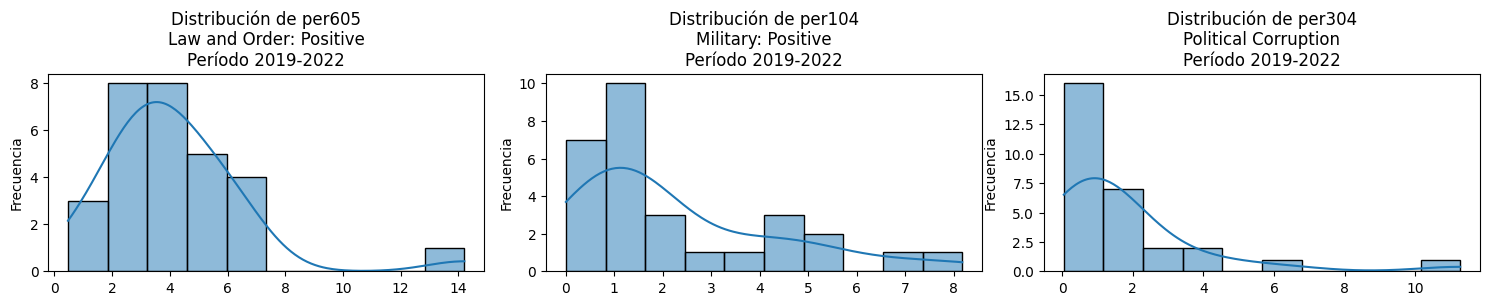

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables 'per' seleccionadas al inicio
selected_variables = variables

# Filtrar el dataframe para estas variables
df_selected = df_periodo[selected_variables]

# Crear un diccionario para mapear cada variable con su detalle desde 'df_AD'
variable_details = df_AD.set_index('Variable_per')['Detalle_Dominio'].to_dict()

# Estadísticas descriptivas
print(f"Estadísticas descriptivas de las variables seleccionadas (Período {desde} a {hasta}):")
display(df_selected.describe().T)

# Visualizar histogramas
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_selected[var], kde=True, bins=10)
    # Título con el detalle de la variable
    detail = variable_details.get(var, "Detalle no disponible")
    plt.title(f'Distribución de {var}\n{detail}\nPeríodo {desde}-{hasta}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


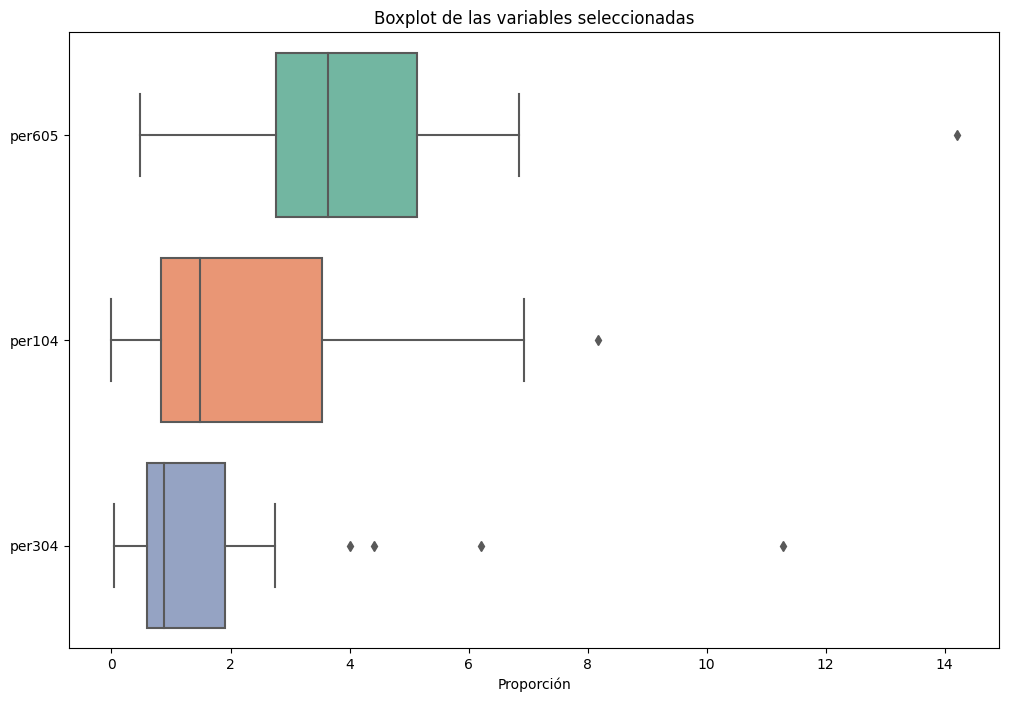

In [31]:
# Boxplots para visualizar outliers y la dispersión de cada variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected, orient="h", palette="Set2")
plt.title("Boxplot de las variables seleccionadas")
plt.xlabel("Proporción")
plt.show()


In [32]:
if not isinstance(selected_variables, list):
    selected_variables = list(selected_variables)
df_selected = df_periodo[['countryname', 'agno'] + selected_variables].copy()


In [33]:
df_selected

,countryname,agno,per605,per104,per304
0,Argentina,2019,3.375097,1.518659,6.209123
1,Armenia,2021,1.217145,6.930662,1.579065
2,Austria,2019,6.838773,1.300189,1.514087
3,Belgium,2019,5.740911,1.067569,0.269786
4,Brazil,2022,4.414072,0.690862,2.595333
5,Canada,2019,6.179909,2.040502,1.058023
6,Chile,2021,4.817641,0.688266,0.654755
7,Denmark,2019,3.643224,1.030195,0.047998
8,Estonia,2019,3.197075,8.179130,0.231651
9,Finland,2019,2.096413,1.816082,0.131395


#### Análisis de outliers

In [34]:
# Asegurar que `df_selected` incluye 'countryname' y 'agno'
df_selected = df_periodo[['countryname', 'agno'] + selected_variables].copy()

# Crear un diccionario para obtener los detalles de las variables 'per' desde 'df_AD'
variable_details = df_AD.set_index('Variable_per')['Detalle_Dominio'].to_dict()

# Identificar valores extremos usando el rango intercuartílico (IQR)
for var in selected_variables:
    Q1 = df_selected[var].quantile(0.25)  # Primer cuartil
    Q3 = df_selected[var].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    
    # Filtrar outliers
    outliers = df_selected[(df_selected[var] < (Q1 - 1.5 * IQR)) | (df_selected[var] > (Q3 + 1.5 * IQR))]
    
    # Mostrar resultados
    print(f"\nVariable: {var}")
    print(f"Descripción: {variable_details.get(var, 'Descripción no disponible')}")
    print(f"Número de outliers: {len(outliers)}")
    
    if not outliers.empty:
        print("Países outliers:")
        countries_outliers = outliers['countryname'].unique()
        print(", ".join(countries_outliers))
        
        # Mostrar detalle de los registros outliers
        display(outliers[['countryname', 'agno', var]])



Variable: per605
Descripción: Law and Order: Positive
Número de outliers: 1
Países outliers:
Sweden


,countryname,agno,per605
24,Sweden,2022,14.205347



Variable: per104
Descripción: Military: Positive
Número de outliers: 1
Países outliers:
Estonia


,countryname,agno,per104
8,Estonia,2019,8.17913



Variable: per304
Descripción: Political Corruption
Número de outliers: 4
Países outliers:
Argentina, Moldova, South Africa, Ukraine


,countryname,agno,per304
0,Argentina,2019,6.209123
15,Moldova,2019,3.999560
21,South Africa,2019,4.418010
25,Ukraine,2019,11.274283


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_13789/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_13789/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_13789/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)


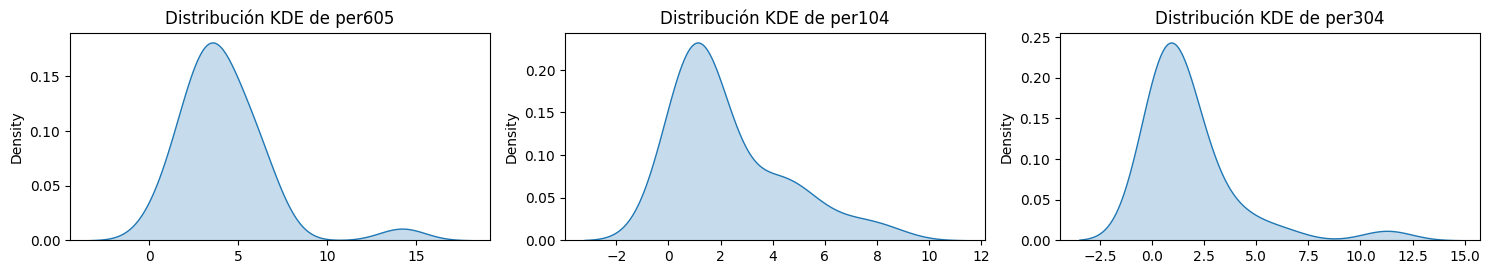

In [35]:
# Visualización KDE
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(df_selected[var], shade=True)
    plt.title(f'Distribución KDE de {var}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


#### Análisis de correlaciones

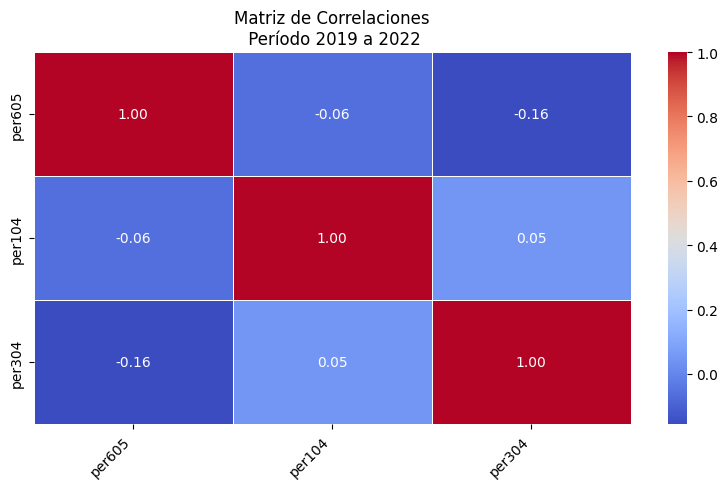

No hay variables con correlación mayor al umbral establecido.


In [36]:
# Seleccionar solo las columnas numéricas para el cálculo de correlaciones
df_selected_numeric = df_selected[selected_variables]

# Calcular la matriz de correlaciones
correlation_matrix = df_selected_numeric.corr()

# Visualizar la matriz de correlaciones como un heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f"Matriz de Correlaciones\n Período {desde} a {hasta}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar pares de variables altamente correlacionadas (umbral > 0.8)
threshold = 0.8
high_corr_pairs = correlation_matrix.where(
    (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
).stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

if not high_corr_pairs.empty:
    print("Pares de variables altamente correlacionadas:")
    display(high_corr_pairs)
else:
    print("No hay variables con correlación mayor al umbral establecido.")


#### 1.Filtrar y Normalizar datos

In [37]:
df_filtered = df_periodo[['countryname', 'agno'] + list(variables)].copy()
df_filtered.head()

,countryname,agno,per605,per104,per304
0,Argentina,2019,3.375097,1.518659,6.209123
1,Armenia,2021,1.217145,6.930662,1.579065
2,Austria,2019,6.838773,1.300189,1.514087
3,Belgium,2019,5.740911,1.067569,0.269786
4,Brazil,2022,4.414072,0.690862,2.595333


In [ ]:
# Filtrar el DataFrame 'df_periodo' para las variables del aspecto
df_filtered = df_periodo[['countryname', 'agno'] + list(variables)].copy()
df_filtered.dropna(inplace=True)

# Normalizar las columnas per
columns_per = variables
df_filtered['per_sum'] = df_filtered[columns_per].sum(axis=1)
rows_to_normalize = df_filtered['per_sum'] != 1.0
df_filtered.loc[rows_to_normalize, columns_per] = df_filtered.loc[rows_to_normalize, columns_per].div(
    df_filtered.loc[rows_to_normalize, 'per_sum'], axis=0
)
df_filtered.drop(columns=['per_sum'], inplace=True)

# Verificar que las variables per sumen 1
assert df_filtered[columns_per].sum(axis=1).round(6).eq(1).all(), "Error: las variables per no suman 1."

# Mostrar el DataFrame filtrado y normalizado
print("\nDataFrame filtrado y normalizado:")
display(df_filtered)


#### K-MEANS
* Aplicamos el elbow method para determinar un número óptimo de clusters según K-MEANS
* Ejecutamos K Means
* En base a la mayor varianza en los datos originales, elegimos los dos ejes para el gráfico 2D de los Clusters

In [ ]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# Estandarización de las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para encontrar el número óptimo de clusters
wcss = []  # Suma de los cuadrados dentro del cluster
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
diffs = np.diff(wcss)
k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima

# Graficar el método del codo con línea vertical en el número óptimo de clusters
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bx-', label="WCSS")
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f"K óptimo = {k_optimo}")
plt.xlabel('Número de clusters (K)')
plt.ylabel('Suma de los cuadrados dentro del cluster (WCSS)')
plt.title('El método del codo para encontrar el número óptimo de clusters\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Aplicar K-MEANS con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales (antes de estandarizar)
variances_original = np.var(X, axis=0)  # Calcula la varianza para cada columna sin escalar
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales (sin escalar):")
display(variance_df_original)

# Análisis de distribuciones de las variables asociadas a DROGAS_Y_CORRUPCIÓN
plt.figure(figsize=(10, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_filtered[var], kde=True, bins=10, color='blue')
    plt.title(f'Distribución de {var}\nAspecto: {aspecto_filtro}\nPeríodo: {desde}-{hasta}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# Seleccionar las dos variables con mayor varianza
top_variables = variance_df_original.iloc[:2]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = np.where(np.array(variables) == top_variables[0])[0][0]
eje_y_idx = np.where(np.array(variables) == top_variables[1])[0][0]

# Marcar Chile en el gráfico
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X_scaled[df_filtered.index == chile_row.index[0]][0]

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)  # Colores para cada cluster

for cluster_id in range(k_optimo):
    cluster_points_x = X_scaled[labels == cluster_id, eje_x_idx]
    cluster_points_y = X_scaled[labels == cluster_id, eje_y_idx]
    plt.scatter(cluster_points_x, cluster_points_y, label=f'Cluster {cluster_id}', 
                s=50, alpha=0.7, edgecolor='black', marker='o')

# Añadir los centroides al gráfico
plt.scatter(
    centroids[:, eje_x_idx], centroids[:, eje_y_idx],
    c='red', s=200, marker='X', edgecolor='black', label="Centroides"
)

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()



# Gráfico en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
    c=labels, cmap='viridis', s=50, label="Puntos"
)

# Añadir los centroides al gráfico
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='red', s=200, marker='X', edgecolor='black', label="Centroides"
)

# Resaltar Chile en el gráfico 3D
if chile_coords is not None:
    ax.scatter(
        chile_coords[0], chile_coords[1], chile_coords[2],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
ax.set_title('Clusters de países en el espacio de variables\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))

# Crear una leyenda
legend = ax.legend(loc="upper right")
ax.add_artist(legend)

plt.show()

# Mostrar los países en cada cluster
df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


# NO LO HE REVISADO

### Observaciones:

- Esto sugiere que 
- 
---


#### 4.Visualicemos qué países-programas hay en cada cluster

#### Clusters y países

In [ ]:
# Explorar los países y períodos en cada clúster
for cluster in range(optimal_k):
    cluster_data = df_pca_optimized[df_pca_optimized['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Total Programas: {len(cluster_data)}")

    # Obtener la lista de países únicos en el clúster
    unique_countries = cluster_data['countryname'].unique()
    print(f"Países en el clúster: [{', '.join(unique_countries)}]")

    # Mostrar los datos relevantes del clúster
    display(cluster_data[['countryname', 'agno', 'PC1', 'PC2', 'PC3']])



# NO LO HE REVISADO DE AQUÍ HASTA EL FINAL
### Análisis de los cluster

### <span style="color:blue;">Cluster 0:</span> Contexto de Corrupción y Drogas (2019-2022)

#### Países en el Cluster:
- **Armenia**
- **Estonia**
- **Finland**
- **Georgia**
- **Iceland**
- **Lithuania**
- **United States**
- **Australia**

#### Elementos Comunes en el Contexto de Corrupción y Drogas:
1. **Compromiso con la Ley y el Orden**:
   - Los países de este cluster comparten un fuerte enfoque en la implementación de medidas para reforzar la **seguridad interna** y **combatir el crimen organizado**, lo cual está reflejado en la variable **`per605: Law and Order: Positive`**.
   - Por ejemplo, Estonia, Finlandia y Australia tienen un historial de políticas estrictas hacia el narcotráfico y el crimen organizado.

2. **Tradicionalismo Moral**:
   - La **`per603: Traditional Morality: Positive`** sugiere que estos países tienden a promover valores morales tradicionales en su narrativa política, lo que podría implicar enfoques conservadores hacia problemas sociales, incluyendo las drogas y la corrupción.
   - Georgia y Armenia, en particular, son conocidos por su énfasis en valores tradicionales y reformas sociales.

3. **Corrupción Política Baja o Reformas Anti-corrupción**:
   - Los países de este cluster están clasificados, en general, como naciones con **bajos niveles de corrupción política**, o han implementado políticas recientes de reforma institucional (reflejado en **`per304: Political Corruption`**).
   - Por ejemplo, países como Estonia e Islandia son reconocidos por sus medidas progresistas para aumentar la transparencia gubernamental.

4. **Apoyo Positivo al Militarismo**:
   - La **`per104: Military: Positive`** indica que algunos países en este cluster apoyan el uso del **poder militar** para reforzar la seguridad, incluyendo operaciones contra el narcotráfico o el crimen transnacional.
   - Australia y los Estados Unidos destacan por su capacidad militar avanzada y por liderar esfuerzos internacionales contra el tráfico de drogas.

#### Resumen:
Este cluster agrupa países que comparten:
- Un enfoque decidido en **reforzar la seguridad interna** y **combatir la corrupción**.
- Una orientación hacia **valores morales tradicionales**, con énfasis en la estabilidad social.
- Políticas activas y reconocidas internacionalmente para combatir el **narcotráfico** y el **crimen organizado**.
- Bajo nivel de corrupción o esfuerzos significativos en **reformas anti-corrupción**.

Este análisis sugiere que los países de este cluster priorizan estrategias integrales de seguridad y reformas políticas para abordar los problemas de corrupción y narcotráfico.
```

### <span style="color:blue;">Cluster 1:</span> Contexto de Corrupción y Drogas (2019-2022)

#### Países en el Cluster:
- **Austria**
- **Belgium**
- **Canada**
- **Chile**
- **Denmark**
- **Germany**
- **Netherlands**
- **New Zealand**
- **Portugal**
- **South Korea**
- **Spain**
- **Sweden**
- **United Kingdom**

#### Elementos Comunes en el Contexto de Corrupción y Drogas:
1. **Compromiso con la Transparencia y Reformas Anticorrupción**:
   - Los países en este cluster comparten un enfoque continuo en el combate a la **corrupción política**, reflejado en la variable **`per304: Political Corruption`**.
   - Alemania, Suecia y Dinamarca, en particular, son reconocidos por ser líderes globales en **transparencia gubernamental** y **rendición de cuentas**.

2. **Enfoque Progresista y Valores Sociales**:
   - Las políticas de muchos de estos países reflejan un enfoque progresista, donde se prioriza el **bienestar social** y la **igualdad de derechos**, asociado a la variable **`per603: Traditional Morality: Positive`**.
   - Nueva Zelanda, Canadá y los Países Bajos son ejemplos destacados en la promoción de políticas inclusivas y valores democráticos sólidos.

3. **Cooperación Internacional y Políticas Contra el Narcotráfico**:
   - Este cluster incluye países con roles activos en la **cooperación internacional** para combatir el tráfico de drogas y el crimen organizado.
   - Portugal y los Países Bajos, por ejemplo, han liderado debates globales sobre políticas alternativas de control de drogas, mientras que el Reino Unido y Corea del Sur han implementado medidas estrictas para frenar el tráfico.

4. **Moderado Apoyo Militar**:
   - La variable **`per104: Military: Positive`** refleja un apoyo moderado al uso del poder militar en estos países. En su mayoría, estos países confían más en **estrategias policiales y diplomáticas** que en operaciones militares para combatir el narcotráfico.
   - España y Chile, sin embargo, han utilizado estrategias militares en ciertas regiones afectadas por el tráfico de drogas.

5. **Fortaleza Institucional y Gobernabilidad**:
   - Estos países destacan por su **fortaleza institucional** y su capacidad para implementar políticas efectivas de seguridad y justicia.
   - Canadá, Suecia y Alemania son reconocidos por su capacidad para equilibrar el fortalecimiento del orden público y los derechos humanos.

#### Resumen:
Este cluster agrupa países que:
- **Priorizan la transparencia** y **reformas anti-corrupción** en sus políticas internas.
- Promueven un enfoque progresista en **valores sociales** y **políticas inclusivas**.
- Participan activamente en la **cooperación internacional** contra el narcotráfico.
- Mantienen un enfoque **institucional y moderado** en la seguridad, con un rol limitado del poder militar.

El análisis muestra que estos países son reconocidos por su capacidad institucional y su enfoque progresista para abordar los problemas de corrupción y narcotráfico, equilibrando la seguridad y los derechos humanos.
```

### <span style="color:blue;">Cluster 2:</span> Contexto de Corrupción y Drogas (2019-2022)

#### Países en el Cluster:
- **Argentina**
- **Brazil**
- **Greece**
- **Moldova**
- **Montenegro**
- **Panama**
- **South Africa**
- **Ukraine**

#### Elementos Comunes en el Contexto de Corrupción y Drogas:
1. **Altos Niveles de Corrupción Institucional**:
   - Los países en este cluster enfrentan **desafíos significativos en corrupción política**, reflejado en la variable **`per304: Political Corruption`**.
   - Ucrania, Brasil y Sudáfrica han enfrentado casos de **escándalos políticos** de gran escala en los últimos años.

2. **Presión del Narcotráfico y el Crimen Organizado**:
   - La presencia de redes de **narcotráfico** y crimen organizado es una problemática recurrente en este grupo.
   - Países como Brasil, Panamá y Sudáfrica son rutas clave en el tráfico de drogas y han implementado políticas específicas para combatir este problema, aunque con resultados mixtos.

3. **Dependencia del Poder Militar**:
   - La variable **`per104: Military: Positive`** indica que estos países han utilizado **estrategias militares** para combatir el crimen organizado y el narcotráfico.
   - Brasil y Ucrania han incrementado el despliegue militar en zonas críticas para enfrentar problemas de narcotráfico y crimen organizado.

4. **Debilidad Institucional**:
   - Este cluster incluye países con **sistemas institucionales débiles** o en transición, lo que dificulta la implementación de políticas sostenibles contra la corrupción y el narcotráfico.
   - Moldova y Montenegro, por ejemplo, enfrentan desafíos de **gobernabilidad** y conflictos de interés dentro de sus sistemas políticos.

5. **Impacto Económico y Social del Crimen**:
   - El narcotráfico y la corrupción han exacerbado problemas económicos y sociales, aumentando las desigualdades y afectando el desarrollo en estos países.
   - En Argentina y Sudáfrica, la corrupción y el crimen organizado han tenido efectos negativos sobre la confianza pública y la inversión.

6. **Aproximaciones Localizadas y Descoordinadas**:
   - A diferencia de los otros clusters, estos países tienden a adoptar **aproximaciones descentralizadas** o **localizadas**, con esfuerzos fragmentados para combatir estos problemas.

#### Resumen:
Este cluster agrupa países que:
- Enfrentan **altos niveles de corrupción** y problemas asociados al **crimen organizado** y el narcotráfico.
- Tienen una **dependencia significativa del poder militar** para tratar de contener estas problemáticas.
- Carecen de **fortaleza institucional** para implementar reformas de largo plazo.
- Experimentan **impactos sociales y económicos negativos**, afectando la confianza pública y la gobernabilidad.

El análisis muestra que estos países comparten desafíos estructurales que los posicionan en una categoría de **alta vulnerabilidad**, donde la corrupción y el narcotráfico son problemas críticos y persistentes.
```

---
### Cómo mejorar la selección inicial de variables 'per' para un aspecto dado?

* Elegí un subconjunto de variables `per` para representar un aspecto específico (COVID) basándome en mi conocimiento e intuición, pero, dado el número elevado de variables disponibles, es posible que el conjunto inicial no sea el más representativo o eficiente. Optimizar la selección inicial podría mejorar significativamente el análisis.

### Estrategias para Elegir un Mejor Subconjunto Inicial

#### 1. **Análisis Exploratorio Preliminar**
   - **Distribución:** Analiza la distribución de cada variable `per` en el conjunto de datos. Variables con baja variación podrían tener menor impacto en el análisis.
   - **Correlaciones:** Calcula correlaciones entre las variables `per`. Si dos variables están altamente correlacionadas, podrías conservar solo una para evitar redundancias.
   - **Relación con el aspecto:** Si tienes alguna métrica asociada al aspecto (ej., indicadores externos), calcula la relación de cada variable con dicha métrica.

#### 2. **Reducción Automática Basada en PCA**
   Usa PCA directamente sobre todas las variables `per` disponibles y selecciona las que contribuyen más significativamente a las primeras componentes principales. Este enfoque puede automatizar la selección inicial.

#### 3. **Uso de Métodos de Selección de Características**
   Si tienes alguna variable objetivo que deseas predecir o clasificar, puedes usar técnicas de selección supervisadas:
   - **Regresión o clasificación:** Modelos como `Random Forest` o `Lasso Regression` pueden identificar qué variables `per` tienen mayor importancia.
   - **Análisis no supervisado:** Usa métricas como el método del codo aplicado al clustering para evaluar cómo cambia la calidad del agrupamiento al incluir o excluir variables.

#### 4. **Combinaciones Heurísticas**
   Implementa un enfoque como el ejemplo de **Forward Selection** que mencioné antes. Esto permite iterar automáticamente para encontrar combinaciones óptimas que maximicen la varianza explicada en el PCA.

---

